In [10]:

from neuron import h
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from neuron.units import ms, mV
import plotly.io as pio
from matplotlib import pyplot, cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
import os

font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式

# mean local conductance

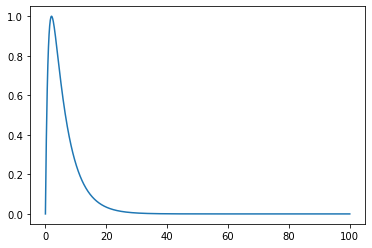

In [6]:
run_dt=0.1
syn_tau1 = 1.
syn_tau2 = 5.
fE = 1e-3
t=np.arange(0,100+run_dt,run_dt)
NE = ((syn_tau1/syn_tau2)**(syn_tau1/(syn_tau2-syn_tau1))-(syn_tau1/syn_tau2)**(syn_tau2/(syn_tau2-syn_tau1)))**-1
uE = NE*(np.exp(-t/syn_tau2)-np.exp(-t/syn_tau1))
plt.plot(t,uE)
ground_truth = np.mean(uE)

In [42]:
def local_mean_error(txtname_apic = "estimated_mean_cond_active_apicloc109_fI1e3_blockIh.txt", txtname_dend = "estimated_mean_cond_active_dendloc84_fE1e4.txt", fE = 1e-4):




    # 修改当前路径为指定路径
    os.chdir("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance")

    run_dt=0.1
    syn_tau1 = 1.
    syn_tau2 = 5.
    t=np.arange(0,100+run_dt,run_dt)
    NE = ((syn_tau1/syn_tau2)**(syn_tau1/(syn_tau2-syn_tau1))-(syn_tau1/syn_tau2)**(syn_tau2/(syn_tau2-syn_tau1)))**-1
    uE = NE*(np.exp(-t/syn_tau2)-np.exp(-t/syn_tau1))
    ground_truth = np.mean(uE)


    estimated_mean_cond_apic= np.loadtxt(txtname_apic)
    estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
    estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

    estimated_mean_cond_dend= np.loadtxt(txtname_dend)
    estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
    estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]


    var_dend_trad = np.abs(estimated_mean_cond_trad_dend - ground_truth*fE)/(ground_truth*fE)
    var_apic_trad = np.abs(estimated_mean_cond_trad_apic - ground_truth*fE)/(ground_truth*fE)
    var_dend_us = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
    var_apic_us = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)
    error = {}
    error['dend_trad_minmax'] = np.array([np.min(var_dend_trad),np.max(var_dend_trad)])
    error['apic_trad_minmax'] = np.array([np.min(var_apic_trad),np.max(var_apic_trad)])
    error['dend_us_minmax'] = np.array([np.min(var_dend_us),np.max(var_dend_us)])
    error['apic_us_minmax'] = np.array([np.min(var_apic_us),np.max(var_apic_us)])

    error['trad_mean'] = np.mean(np.concatenate((var_dend_trad,var_apic_trad)))
    error['us_mean'] = np.mean(np.concatenate((var_dend_us,var_apic_us)))
    
    return error

## passive

In [43]:
# E
error_passive_E = local_mean_error(txtname_apic = "estimated_mean_cond_passive_apicloc109_fE1e4.txt", txtname_dend = "estimated_mean_cond_passive_dendloc84_fE1e4.txt", fE = 1e-4)
print("passive E:")
print(error_passive_E)
# I
error_passive_I = local_mean_error(txtname_apic = "estimated_mean_cond_passive_apicloc109_fI1e3.txt", txtname_dend = "estimated_mean_cond_passive_dendloc84_fI1e3.txt", fE = 1e-3)
print("passive I:")
print(error_passive_I)


passive E:
{'dend_trad_minmax': array([0.01226287, 0.19252848]), 'apic_trad_minmax': array([0.02534454, 0.6738184 ]), 'dend_us_minmax': array([0.00010424, 0.09121816]), 'apic_us_minmax': array([7.85099568e-05, 1.15191146e-01]), 'trad_mean': 0.20243741798141943, 'us_mean': 0.02381023184735968}
passive I:
{'dend_trad_minmax': array([0.02472107, 0.57595547]), 'apic_trad_minmax': array([0.04312848, 0.88852166]), 'dend_us_minmax': array([0.00181838, 0.48801968]), 'apic_us_minmax': array([0.00130165, 0.51956893]), 'trad_mean': 0.3651632548357778, 'us_mean': 0.16071717629008736}


## active

In [44]:
# E
error_active_E = local_mean_error(txtname_apic = "estimated_mean_cond_active_apicloc109_fE1e4_gIhbar_Ih0_05.txt", txtname_dend = "estimated_mean_cond_active_dendloc84_fE1e4_gIhbar_Ih0_05.txt", fE = 1e-4)
print("active E:")
print(error_active_E)
# I
error_active_I = local_mean_error(txtname_apic = "estimated_mean_cond_active_apicloc109_fI1e3_gIhbar_Ih0_05.txt", txtname_dend = "estimated_mean_cond_active_dendloc84_fI1e3_gIhbar_Ih0_05.txt", fE = 1e-3)
print("active I:")
print(error_active_I)


active E:
{'dend_trad_minmax': array([0.0130786 , 0.20069622]), 'apic_trad_minmax': array([0.0274188 , 0.69640733]), 'dend_us_minmax': array([0.00045423, 0.05020596]), 'apic_us_minmax': array([0.00168819, 0.81257752]), 'trad_mean': 0.2138720001214826, 'us_mean': 0.13741371681129055}
active I:
{'dend_trad_minmax': array([0.02299658, 0.57578456]), 'apic_trad_minmax': array([0.0417536 , 0.89113271]), 'dend_us_minmax': array([0.00158747, 0.48769092]), 'apic_us_minmax': array([0.00070548, 0.55414812]), 'trad_mean': 0.36607256608434113, 'us_mean': 0.1683521425978611}


# block Ih

In [45]:
# E
error_active_blockIh_E = local_mean_error(txtname_apic = "estimated_mean_cond_active_apicloc109_fE1e4_blockIh.txt", txtname_dend = "estimated_mean_cond_active_dendloc84_fE1e4_blockIh.txt", fE = 1e-4)
print("active blockIh E:")
print(error_active_blockIh_E)
# I
error_active_blockIh_I = local_mean_error(txtname_apic = "estimated_mean_cond_active_apicloc109_fI1e3_blockIh.txt", txtname_dend = "estimated_mean_cond_active_dendloc84_fI1e3_blockIh.txt", fE = 1e-3)
print("active blockIh I:")
print(error_active_blockIh_I)


active blockIh E:
{'dend_trad_minmax': array([0.0119076 , 0.19222896]), 'apic_trad_minmax': array([0.02520494, 0.6787389 ]), 'dend_us_minmax': array([0.0002792 , 0.08496174]), 'apic_us_minmax': array([0.00013649, 0.0977082 ]), 'trad_mean': 0.20388736481605557, 'us_mean': 0.018925605303505684}
active blockIh I:
{'dend_trad_minmax': array([0.02287467, 0.57516543]), 'apic_trad_minmax': array([0.04156575, 0.89003811]), 'dend_us_minmax': array([0.00242293, 0.48890551]), 'apic_us_minmax': array([0.00185238, 0.52259639]), 'trad_mean': 0.36519620937037833, 'us_mean': 0.16193924548644856}


# synaptic time constant

In [57]:
def syn_time_error(txtname_apic = "estimated_lambdas_passive_apicloc109_fE1e4.txt", txtname_dend = "estimated_lambdas_passive_dendloc84_fE1e4.txt"):


        # 修改当前路径为指定路径
        os.chdir("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron")

        estimated_lambdas_dend= np.loadtxt(txtname_dend)
        estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
        estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]

        estimated_lambdas_apic= np.loadtxt(txtname_apic)
        estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
        estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]


        truth_rise = 1.0
        truth_decay = 5.0
        var_error_dend_rise = np.abs(estimated_lambdas_dend_rise - truth_rise)/truth_rise
        var_error_dend_decay = np.abs(estimated_lambdas_dend_decay - truth_decay)/truth_decay
        var_error_apic_rise = np.abs(estimated_lambdas_apic_rise - truth_rise)/truth_rise
        var_error_apic_decay = np.abs(estimated_lambdas_apic_decay - truth_decay)/truth_decay
        
        error = {}
        error['dend_rise_minmax'] = np.array([np.min(var_error_dend_rise),np.max(var_error_dend_rise)])
        error['apic_rise_minmax'] = np.array([np.min(var_error_apic_rise),np.max(var_error_apic_rise)])
        error['dend_decay_minmax'] = np.array([np.min(var_error_dend_decay),np.max(var_error_dend_decay)])
        error['apic_decay_minmax'] = np.array([np.min(var_error_apic_decay),np.max(var_error_apic_decay)])

        error['rise_mean'] = np.mean(np.concatenate((var_error_apic_rise,var_error_dend_rise)))
        error['decay_mean'] = np.mean(np.concatenate((var_error_dend_decay,var_error_apic_decay)))
        return error


## passive

In [59]:
# E
error_passive_E = syn_time_error(txtname_apic = "estimated_lambdas_passive_apicloc109_fE1e4.txt", txtname_dend = "estimated_lambdas_passive_dendloc84_fE1e4.txt")
print("passive E:")
print(error_passive_E)

# I
error_passive_I = syn_time_error(txtname_apic = "estimated_lambdas_passive_apicloc109_fI1e3.txt", txtname_dend = "estimated_lambdas_passive_apicloc109_fI1e3.txt")
print("passive I:")
print(error_passive_I)


passive E:
{'dend_rise_minmax': array([0.00100108, 0.27401677]), 'apic_rise_minmax': array([9.74329821e-04, 1.48919331e+00]), 'dend_decay_minmax': array([0.00022793, 0.03889481]), 'apic_decay_minmax': array([4.04089791e-05, 2.55947440e-02]), 'rise_mean': 0.15659326675066038, 'decay_mean': 0.008758498647270343}
passive I:
{'dend_rise_minmax': array([2.21961181e-03, 3.34617520e+00]), 'apic_rise_minmax': array([2.21961181e-03, 3.34617520e+00]), 'dend_decay_minmax': array([0.00049042, 0.16745837]), 'apic_decay_minmax': array([0.00049042, 0.16745837]), 'rise_mean': 0.8370972533403932, 'decay_mean': 0.03505428295762164}


## active

In [61]:
# E
error_active_E = syn_time_error(txtname_apic = "estimated_lambdas_active_apicloc109_fE1e4_gIhbar_Ih0_05.txt", txtname_dend = "estimated_lambdas_active_dendloc84_fE1e4_gIhbar_Ih0_05.txt")
print("active E:")
print(error_active_E)

# I
error_active_I = syn_time_error(txtname_apic = "estimated_lambdas_active_apicloc109_fI1e3_gIhbar_Ih0_05.txt", txtname_dend = "estimated_lambdas_active_apicloc109_fI1e3_gIhbar_Ih0_05.txt")
print("active I:")
print(error_active_I)


active E:
{'dend_rise_minmax': array([0.00071683, 0.25661219]), 'apic_rise_minmax': array([8.81442627e-04, 7.54070528e+00]), 'dend_decay_minmax': array([4.13601622e-05, 2.65261987e-02]), 'apic_decay_minmax': array([1.45822120e-03, 4.49273913e+03]), 'rise_mean': 1.2632042241967114, 'decay_mean': 28.508575483781264}
active I:
{'dend_rise_minmax': array([3.35847690e-03, 6.34562069e+00]), 'apic_rise_minmax': array([3.35847690e-03, 6.34562069e+00]), 'dend_decay_minmax': array([2.40168508e-03, 3.44410931e+00]), 'apic_decay_minmax': array([2.40168508e-03, 3.44410931e+00]), 'rise_mean': 1.4475250123200416, 'decay_mean': 0.4140645183279537}


## active block Ih

In [63]:
# E
error_active_blockIh_E = syn_time_error(txtname_apic = "estimated_lambdas_active_apicloc109_fE1e4_blockIh.txt", txtname_dend = "estimated_lambdas_active_dendloc84_fE1e4_blockIh.txt")
print("active blockIh E:")
print(error_active_blockIh_E)

# I
error_active_blockIh_I = syn_time_error(txtname_apic = "estimated_lambdas_active_apicloc109_fI1e3_blockIh.txt", txtname_dend = "estimated_lambdas_active_apicloc109_fI1e3_blockIh.txt")
print("active blockIh I:")
print(error_active_blockIh_I)


active blockIh E:
{'dend_rise_minmax': array([1.11941423e-05, 2.86857587e-01]), 'apic_rise_minmax': array([1.05370010e-04, 5.01798691e+00]), 'dend_decay_minmax': array([2.08669936e-06, 3.21323408e-02]), 'apic_decay_minmax': array([1.64734354e-04, 7.00867080e+02]), 'rise_mean': 0.865147323270609, 'decay_mean': 4.622543270374593}
active blockIh I:
{'dend_rise_minmax': array([0.00328982, 2.6819161 ]), 'apic_rise_minmax': array([0.00328982, 2.6819161 ]), 'dend_decay_minmax': array([0.00179895, 0.10591945]), 'apic_decay_minmax': array([0.00179895, 0.10591945]), 'rise_mean': 0.6513698425834238, 'decay_mean': 0.0339170336148532}
